# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Zahra sodagar
2.   Student Number: 98101769


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [2]:
dataset = pd.read_csv("data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

train_dataset = dataset.sample(frac=0.8, replace=False)
test_dataset = dataset.drop(train_dataset.index)

x_train, y_train = train_dataset.to_numpy()[:, 1].reshape(-1, 1), train_dataset.to_numpy()[:, 2].reshape(-1, 1)
x_test, y_test = test_dataset.to_numpy()[:, 1].reshape(-1, 1), test_dataset.to_numpy()[:, 2].reshape(-1, 1)


### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [3]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

A = np.hstack((x_train, np.ones_like(x_train)))
m = (np.linalg.inv(A.T @ A) @ A.T @ y_train).ravel()
print(f'the slope is {m[0]:.4f} and the bias is {m[1]:.4f}')

the slope is -1.0206 and the bias is 0.8298


In [4]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = ((y_train - predicted_train_y) ** 2).mean()
test_error = ((y_test - predicted_test_y) ** 2).mean()

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.33174423138338804
MSE test error: 0.32634955407362926


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

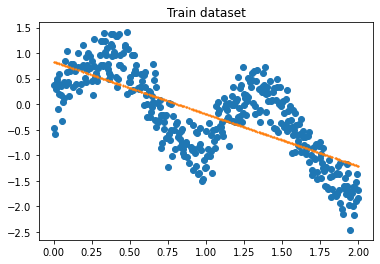

In [5]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")
plt.show()

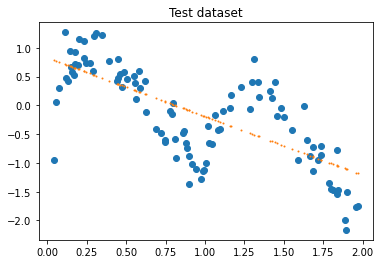

In [6]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")
plt.show()

### Part4:
Were the reported accuracies acceptable? 

Given the data and the linear regressor we have, the MSE is not too high. The model is not following the pattern of the data so we can use models with higher complexity to get a higher accuracy.

What about the line you drew in the last part?

The line is showing the trend of the pattern perfectly (as a line) but it is not complex enough to model the data and the actual value is usually not very close.

Was it appropriate for the dataset?

No, because the data looks like a combination of a line with a sinusoid function and a line can not follow these curves.
<br><br/>
Explain what are the main problems here.



The model we are using is not complex enough so it is underfitted and the MSE could be reduced by using a slightly more complex model.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

In the locally weighted method, we use the closer datapoints to estimate the line. This helps us to follow the local pattern closely and helps us not to focus on capturing the whole pattern with a weak model and, so we can reduce the MSE using the same weak model and underfit less. This method could be a bit noisy if you are not using enough training datapoints.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [7]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        query = np.array([the_query_point[0,0].sum(), 1])
        W[i, i] = np.exp(-np.dot(xi - query, xi - query) / (2 * hyperparameter ** 2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [8]:
import warnings
warnings.filterwarnings("ignore")

def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_dataset.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)

    theta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ train_Y)
    return float(np.dot(qx, theta)) 

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [9]:
predicted_test = [predict(x_train, y_train, query, hyperparameter=0.1) for query in x_test]
error = ((y_test.ravel() - np.array(predicted_test)) ** 2).mean()
print(f"MSE test error: {error}")

MSE test error: 0.09863928668764238


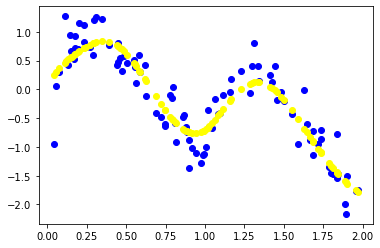

In [10]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.


Yes, it has reduced the MSE error and it is following the main pattern and its curves, but also has not overfitted the data.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well? 

Yes, it could perform well if you are using enough neighbours and it could capture the local pattern, but it could be noisy if k is too small (as a result of overfitting the local data).



### Part10:
Implementing the `KNN model`.

In [11]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.abs(x1 - x2) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        distances = [[self.distance(self.X[i], x), self.Y[i]] for i in range(self.X.shape[0])]
        distances.sort(key=lambda d: d[0])
        indices = [distances[i][1] for i in range(self.k)]
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = sum(neareest_indices) / len(neareest_indices)
        return predicted_y

In [12]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = ((y_test - predicted_y) ** 2).mean()
    return error, predicted_y

In [15]:
for k in range(50):
  k = k + 1
  error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
  print(f"k = {k} -> MSE error of KNN for test dataset: {error_knn}")

k = 1 -> MSE error of KNN for test dataset: 0.1809994837863324
k = 2 -> MSE error of KNN for test dataset: 0.12525380496550909
k = 3 -> MSE error of KNN for test dataset: 0.10246161396475469
k = 4 -> MSE error of KNN for test dataset: 0.09293448962205535
k = 5 -> MSE error of KNN for test dataset: 0.09425242792431815
k = 6 -> MSE error of KNN for test dataset: 0.08968577637534902
k = 7 -> MSE error of KNN for test dataset: 0.08968728692522739
k = 8 -> MSE error of KNN for test dataset: 0.09240978834672058
k = 9 -> MSE error of KNN for test dataset: 0.09215804337873601
k = 10 -> MSE error of KNN for test dataset: 0.09032372074110022
k = 11 -> MSE error of KNN for test dataset: 0.08924594928863085
k = 12 -> MSE error of KNN for test dataset: 0.0898854950853493
k = 13 -> MSE error of KNN for test dataset: 0.08999910307466924
k = 14 -> MSE error of KNN for test dataset: 0.08890100762419242
k = 15 -> MSE error of KNN for test dataset: 0.08998421416495737
k = 16 -> MSE error of KNN for test 

In [16]:
k = 17
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.088636257612842


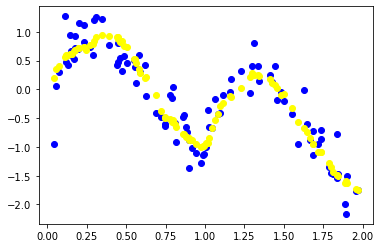

In [17]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

Yes, it has the lowest MSE, also it is following the pattern closely and yet not overfitting it. It also has the least training time and you only need to compute the value at test time.